In [50]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

In [51]:
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf


# Use os.getcwd() instead of os.path.dirname(__file__) in a Jupyter notebook
sys.path.append(os.path.join('../', 'utils'))

from TransformationUtils import ExcelYAMLHandler
from TransformationUtils import StrategyCSVHandler


In [52]:
##  SETUP DIRECTORIES

dir_cur = pathlib.Path(os.getcwd())
dir_data = dir_cur.joinpath("data")
dir_transformations = dir_cur.joinpath("transformations")


##  SETUP FILES

fp_data_base = dir_data.joinpath("sisepuede_inputs_georgia.csv")


##  SETUP SOME SISEPUEDE STUFF

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)

In [53]:
##  BUILD BASE INPUTS

df_inputs_raw = pd.read_csv(fp_data_base)

# pull example data to fill in gaps
examples = SISEPUEDEExamples()
df_inputs_example = examples.input_data_frame

In [54]:
df_inputs_raw.head()

,region,iso_code3,period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,georgia,GEO,0,6970000,70,2923,31.751466,6468,315,508,...,14.251229,27.557750,0.921311,0.813395,0,3.30693,3.306930,39.202663,16.072745,15.929195
1,georgia,GEO,1,6970000,70,2923,31.751466,6468,315,508,...,12.808034,27.557750,0.918334,0.816150,0,3.30693,3.306930,47.312358,15.460559,15.108558
2,georgia,GEO,2,6970000,70,2923,31.751466,6468,315,508,...,12.624132,27.610771,0.916130,0.821111,0,3.30693,3.307371,50.557338,15.350089,15.005724
3,georgia,GEO,3,6970000,70,2923,31.751466,6468,315,508,...,13.037755,33.069300,0.918555,0.816922,0,3.30693,3.790844,52.388716,16.958543,14.721163
4,georgia,GEO,4,6970000,70,2923,31.751466,6468,315,508,...,10.743510,27.557750,0.917673,0.818024,0,3.30693,4.158464,50.068133,13.796953,13.766562


In [55]:
df_inputs_example.head()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08


In [56]:
def compare_dfs(df1, df2):
    # Assuming your DataFrames are df1 and df2
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Columns present in df1 but not in df2
    diff_in_df1 = columns_df1 - columns_df2

    # Columns present in df2 but not in df1
    diff_in_df2 = columns_df2 - columns_df1

    print("Columns in df1 but not in df2:", diff_in_df1)
    print("Columns in df2 but not in df1:", diff_in_df2)

def add_missing_cols(df1, df2):
    # Identify columns in df1 but not in df2
    columns_to_add = [col for col in df1.columns if col not in df2.columns]

    # Add missing columns to df2 with their values from df1
    for col in columns_to_add:
        df2[col] = df1[col]
    
    return df2


In [57]:
compare_dfs(df_inputs_example, df_inputs_raw)


Columns in df1 but not in df2: {'physparam_lvst_bo_sheep_kg_ch4_kg_manure', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_water', 'ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_hydrocarbon_gas_liquids', 'nemomod_entc_emissions_activity_ratio_fuel_production_fp_natural_gas_tonne_n2o_per_tj', 'nemomod_entc_capital_cost_fp_ammonia_production_mm_usd_per_gw', 'frac_agrc_n_in_below_ground_residue_other_annual', 'frac_agrc_n_in_above_ground_residue_rice', 'physparam_lvst_bo_cattle_dairy_kg_ch4_kg_manure', 'ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_gasoline', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_nuclear', 'physparam_lvst_bo_mules_kg_ch4_kg_manure', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_geothermal', 'nemomod_entc_grid_power_constraint_mmm_usd', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_wind', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_natural_gas_unprocessed', 'ef_soil_ef2_n_drained_managed_soils_n2o_tropical_crop_grass_kg_n2on_ha'

In [58]:
df_inputs_raw = df_inputs_raw.rename(columns={'period':'time_period'})
df_inputs_raw_complete = add_missing_cols(df_inputs_example, df_inputs_raw.copy())
df_inputs_raw_complete = df_inputs_raw_complete.drop(columns='iso_code3')
df_inputs_raw_complete.head()

,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_electricity,energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia,energydensity_gravimetric_enfu_gj_per_tonne_fuel_water,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_ammonia_production_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation_ccs,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil
0,georgia,0,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
1,georgia,1,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
2,georgia,2,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
3,georgia,3,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
4,georgia,4,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0


In [59]:
compare_dfs(df_inputs_example, df_inputs_raw_complete)

Columns in df1 but not in df2: set()
Columns in df2 but not in df1: set()


In [60]:
# Get a list of columns with NaN values
# Get a list of columns with NaN values
columns_with_na = df_inputs_raw_complete.columns[df_inputs_raw_complete.isna().any()].tolist()

print(columns_with_na)


[]


#  Let's try building transformations using this


In [61]:
transformers = trf.transformers.Transformers(
    {},
    df_input = df_inputs_raw_complete,
)


##  Instantiate some transformations CAREFUL NOT TO OVERWRITE EXISTING TRANSFORMATIONS!!

In [62]:
# set an ouput path and instantiate
if not dir_transformations.exists():
    trf.instantiate_default_strategy_directory(
        transformers,
        dir_transformations,
    )


##  --HERE, CUSTOMIZE YOUR TRANSFORMATIONS AND STRATEGIES--
- go to `dir_transformers` and edit config files and `strategy_definitions.csv`
- then, go to next cell

In [63]:
excel_yaml_handler = ExcelYAMLHandler(excel_file='data/ssp_georgia_transformation_cw.xlsx', yaml_directory='transformations')

In [64]:
excel_yaml_handler.process_yaml_files()

YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_inen_shift_fuel_heat.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_cattle_pigs.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_other.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_poultry.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lvst_dec_enteric_fermentation.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_pflo_inc_ind_ccs.yaml for strategy strategy_net_zero set to default because it

In [65]:
csv_handler = StrategyCSVHandler('transformations/strategy_definitions.csv', 'transformations')

csv_handler.add_row('6006', 'PFLO', 'Baseline', 'baseline')
csv_handler.add_row('6007', 'PFLO', 'Current Policies A ( NDC 2 deg. Scenario)', 'policies_a')
csv_handler.add_row('6008', 'PFLO', 'Current Policies A ( NDC 1.5 deg. Scenario)', 'policies_b')
csv_handler.add_row('6009', 'PFLO', 'Net Zero', 'net_zero')
csv_handler.save_csv()

Added new row: {'strategy_id': '6006', 'strategy_code': 'PFLO:BASELINE', 'strategy': 'baseline', 'description': 'Baseline', 'transformation_specification': 'TX:WASO:INC_LANDFILLING_STRATEGY_BASELINE|TX:INEN:INC_EFFICIENCY_PRODUCTION_STRATEGY_BASELINE|TX:TRNS:SHIFT_MODE_PASSENGER_STRATEGY_BASELINE|TX:WASO:INC_ANAEROBIC_AND_COMPOST_STRATEGY_BASELINE|TX:AGRC:DEC_CH4_RICE_STRATEGY_BASELINE|TX:ENTC:DEC_LOSSES_STRATEGY_BASELINE|TX:LNDU:INC_REFORESTATION_STRATEGY_BASELINE|TX:TRNS:SHIFT_MODE_REGIONAL_STRATEGY_BASELINE|TX:WASO:INC_ENERGY_FROM_INCINERATION_STRATEGY_BASELINE|TX:TRNS:SHIFT_FUEL_LIGHT_DUTY_STRATEGY_BASELINE|TX:WASO:INC_ENERGY_FROM_BIOGAS_STRATEGY_BASELINE|TX:WASO:INC_CAPTURE_BIOGAS_STRATEGY_BASELINE|TX:ENTC:TARGET_RENEWABLE_ELEC_STRATEGY_BASELINE|TX:INEN:INC_EFFICIENCY_ENERGY_STRATEGY_BASELINE|TX:LNDU:DEC_DEFORESTATION_STRATEGY_BASELINE|TX:AGRC:INC_PRODUCTIVITY_STRATEGY_BASELINE|TX:WASO:INC_RECYCLING_STRATEGY_BASELINE|TX:TRNS:SHIFT_MODE_FREIGHT_STRATEGY_BASELINE'}
Added new row: {'

In [66]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations,
    transformers = transformers,
)
tab = transformations.attribute_transformation.table

In [67]:
#  build the strategies -- will export to path
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")

Strategies defined at /home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/transformations initialized in 2.92 seconds


In [68]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6006,PFLO:BASELINE,baseline,Baseline,TX:WASO:INC_LANDFILLING_STRATEGY_BASELINE|TX:I...,0
70,6007,PFLO:POLICIES_A,policies_a,Current Policies A ( NDC 2 deg. Scenario),TX:INEN:INC_EFFICIENCY_ENERGY_STRATEGY_POLICIE...,0
71,6008,PFLO:POLICIES_B,policies_b,Current Policies A ( NDC 1.5 deg. Scenario),TX:WASO:INC_RECYCLING_STRATEGY_POLICIES_B|TX:E...,0


##  Build our templates
- let's use the default variable groupings for LHS

In [69]:
df_vargroups = examples("variable_trajectory_group_specification")

strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups,
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6006, 6007, 6008, 6009],
)

0

# Finally, load SISEPUEDE so that we can run it

In [70]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    #id_str = "sisepuede_run_2024-11-06",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["georgia"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-11-07 13:36:11,263 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-11-07 13:36:11,263 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-11-07 13:36:11,266 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-11-07 13:36:11,266 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-11-07 13:36:11,267 - INFO - 	Setting export engine to 'csv'.
2024-11-07 13:36:11,267 - INFO - 	Setting export engine to 'csv'.
2024-11-07 13:36:11,268 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-11-07 13:36:11,268 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-11-07 13:36:11,269 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-11-07 13:36:11,269 - INFO - Successfully

In [75]:
dict_scens = {
    ssp.key_design: [0],
    ssp.key_future: [0],
    ssp.key_strategy: [0, 6006, 6007, 6008,6009],
}

ssp.project_scenarios(
    dict_scens,
    save_inputs = True,
)

2024-11-07 13:39:12,334 - INFO - 
***	STARTING REGION georgia	***

2024-11-07 13:39:12,334 - INFO - 
***	STARTING REGION georgia	***

2024-11-07 13:39:14,718 - INFO - Trying run primary_id = 0 in region georgia
2024-11-07 13:39:14,718 - INFO - Trying run primary_id = 0 in region georgia
2024-11-07 13:39:14,719 - INFO - Running AFOLU model
2024-11-07 13:39:14,719 - INFO - Running AFOLU model
2024-11-07 13:39:14,848 - INFO - AFOLU model run successfully completed
2024-11-07 13:39:14,848 - INFO - AFOLU model run successfully completed
2024-11-07 13:39:14,849 - INFO - Running CircularEconomy model
2024-11-07 13:39:14,849 - INFO - Running CircularEconomy model
2024-11-07 13:39:14,890 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:39:14,890 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:39:14,891 - INFO - Running IPPU model
2024-11-07 13:39:14,891 - INFO - Running IPPU model
2024-11-07 13:39:14,954 - INFO - IPPU model run successfully complet

2024-07-Nov 13:39:15.077 Opened SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-07-Nov 13:39:15.100 Added NEMO structure to SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-07-Nov 13:39:16.068 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-07 13:40:39,560 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:40:39,560 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:40:39,570 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:40:39,570 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:40:39,571 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:40:39,571 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:40:39,610 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:40:39,610 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:40:39,611 - INFO - Appending Socioeconomic outputs
2024-11-07 13:40:39,611 - INFO - Appending Socioec

2024-07-Nov 13:40:39.436 Finished modeling scenario.


2024-11-07 13:40:39,646 - INFO - Trying run primary_id = 69069 in region georgia
2024-11-07 13:40:39,646 - INFO - Trying run primary_id = 69069 in region georgia
2024-11-07 13:40:39,647 - INFO - Running AFOLU model
2024-11-07 13:40:39,647 - INFO - Running AFOLU model
2024-11-07 13:40:39,777 - INFO - AFOLU model run successfully completed
2024-11-07 13:40:39,777 - INFO - AFOLU model run successfully completed
2024-11-07 13:40:39,778 - INFO - Running CircularEconomy model
2024-11-07 13:40:39,778 - INFO - Running CircularEconomy model
2024-11-07 13:40:39,819 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:40:39,819 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:40:39,820 - INFO - Running IPPU model
2024-11-07 13:40:39,820 - INFO - Running IPPU model
2024-11-07 13:40:39,883 - INFO - IPPU model run successfully completed
2024-11-07 13:40:39,883 - INFO - IPPU model run successfully completed
2024-11-07 13:40:39,884 - INFO - Running Energy mode

2024-07-Nov 13:40:41.001 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-07 13:41:39,198 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:41:39,198 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:41:39,208 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:41:39,208 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:41:39,209 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:41:39,209 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:41:39,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:41:39,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:41:39,249 - INFO - Appending Socioeconomic outputs
2024-11-07 13:41:39,249 - INFO - Appending Socioec

2024-07-Nov 13:41:39.069 Finished modeling scenario.


2024-11-07 13:41:39,408 - INFO - AFOLU model run successfully completed
2024-11-07 13:41:39,408 - INFO - AFOLU model run successfully completed
2024-11-07 13:41:39,409 - INFO - Running CircularEconomy model
2024-11-07 13:41:39,409 - INFO - Running CircularEconomy model
2024-11-07 13:41:39,454 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:41:39,454 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:41:39,455 - INFO - Running IPPU model
2024-11-07 13:41:39,455 - INFO - Running IPPU model
2024-11-07 13:41:39,521 - INFO - IPPU model run successfully completed
2024-11-07 13:41:39,521 - INFO - IPPU model run successfully completed
2024-11-07 13:41:39,522 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-07 13:41:39,522 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-07 13:41:39,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2024-07-Nov 13:41:40.650 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-07 13:43:10,399 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:43:10,399 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:43:10,411 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:43:10,411 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:43:10,412 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:43:10,412 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:43:10,458 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:43:10,458 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:43:10,459 - INFO - Appending Socioeconomic outputs
2024-11-07 13:43:10,459 - INFO - Appending Socioec

2024-07-Nov 13:43:10.273 Finished modeling scenario.


2024-11-07 13:43:10,481 - INFO - Model run for primary_id = 70070 successfully completed in 91.21 seconds (n_tries = 1).
2024-11-07 13:43:10,481 - INFO - Model run for primary_id = 70070 successfully completed in 91.21 seconds (n_tries = 1).
2024-11-07 13:43:10,486 - INFO - Trying run primary_id = 71071 in region georgia
2024-11-07 13:43:10,486 - INFO - Trying run primary_id = 71071 in region georgia
2024-11-07 13:43:10,487 - INFO - Running AFOLU model
2024-11-07 13:43:10,487 - INFO - Running AFOLU model
2024-11-07 13:43:10,620 - INFO - AFOLU model run successfully completed
2024-11-07 13:43:10,620 - INFO - AFOLU model run successfully completed
2024-11-07 13:43:10,621 - INFO - Running CircularEconomy model
2024-11-07 13:43:10,621 - INFO - Running CircularEconomy model
2024-11-07 13:43:10,996 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:43:10,996 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:43:10,998 - INFO - Running IPPU model
2024

2024-07-Nov 13:43:12.206 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-07 13:44:18,576 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:44:18,576 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:44:18,585 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:44:18,585 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:44:18,586 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:44:18,586 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:44:18,624 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:44:18,624 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:44:18,625 - INFO - Appending Socioeconomic outputs
2024-11-07 13:44:18,625 - INFO - Appending Socioec

2024-07-Nov 13:44:18.458 Finished modeling scenario.


2024-11-07 13:44:18,779 - INFO - AFOLU model run successfully completed
2024-11-07 13:44:18,779 - INFO - AFOLU model run successfully completed
2024-11-07 13:44:18,780 - INFO - Running CircularEconomy model
2024-11-07 13:44:18,780 - INFO - Running CircularEconomy model
2024-11-07 13:44:18,822 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:44:18,822 - INFO - CircularEconomy model run successfully completed
2024-11-07 13:44:18,823 - INFO - Running IPPU model
2024-11-07 13:44:18,823 - INFO - Running IPPU model
2024-11-07 13:44:18,888 - INFO - IPPU model run successfully completed
2024-11-07 13:44:18,888 - INFO - IPPU model run successfully completed
2024-11-07 13:44:18,889 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-07 13:44:18,889 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-11-07 13:44:18,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2024-07-Nov 13:44:19.971 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-11-07 13:45:02,012 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:45:02,012 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-11-07 13:45:02,022 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:45:02,022 - INFO - EnergyProduction model run successfully completed
2024-11-07 13:45:02,023 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:45:02,023 - INFO - Running Energy (Fugitive Emissions)
2024-11-07 13:45:02,062 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:45:02,062 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-11-07 13:45:02,063 - INFO - Appending Socioeconomic outputs
2024-11-07 13:45:02,063 - INFO - Appending Socioec

2024-07-Nov 13:45:01.892 Finished modeling scenario.


2024-11-07 13:45:02,194 - INFO - Table MODEL_OUTPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-07T13;36;10.852578/sisepuede_run_2024-11-07T13;36;10.852578_output_database/MODEL_OUTPUT.csv.
2024-11-07 13:45:02,194 - INFO - Table MODEL_OUTPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-07T13;36;10.852578/sisepuede_run_2024-11-07T13;36;10.852578_output_database/MODEL_OUTPUT.csv.
2024-11-07 13:45:02,198 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-11-07T13;36;10.852578/sisepuede_run_2024-11-07T13;36;10.852578_output_database/ATTRIBUTE_PRIMARY.csv.
2024-11-07 13:45:02,198 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/s

{'georgia': [0, 69069, 70070, 71071, 72072]}

In [76]:
df_run = ssp.generate_scenario_database_from_primary_key(0)
df_run = df_run.get("georgia")
df_run.to_csv("/home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/output/georgia_baselines_temp.csv", encoding = "UTF-8", index = None, )

In [77]:
df_out = ssp.read_output(None)

In [78]:
df_in = ssp.read_input(None)

In [79]:
df_out.primary_id.unique()

array([    0, 69069, 70070, 71071, 72072])

# option to pass `df_out` back to data_modifications
- do this if the outputs are needed to rescale input demand values to match IEA data

In [80]:
dir_data

PosixPath('/home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/data')

In [81]:
(
    df_out
    .to_csv(
        dir_data.joinpath("sisepuede_outputs_georgia.csv"),
        index = None,
        encoding = "UTF-8",
    )
)

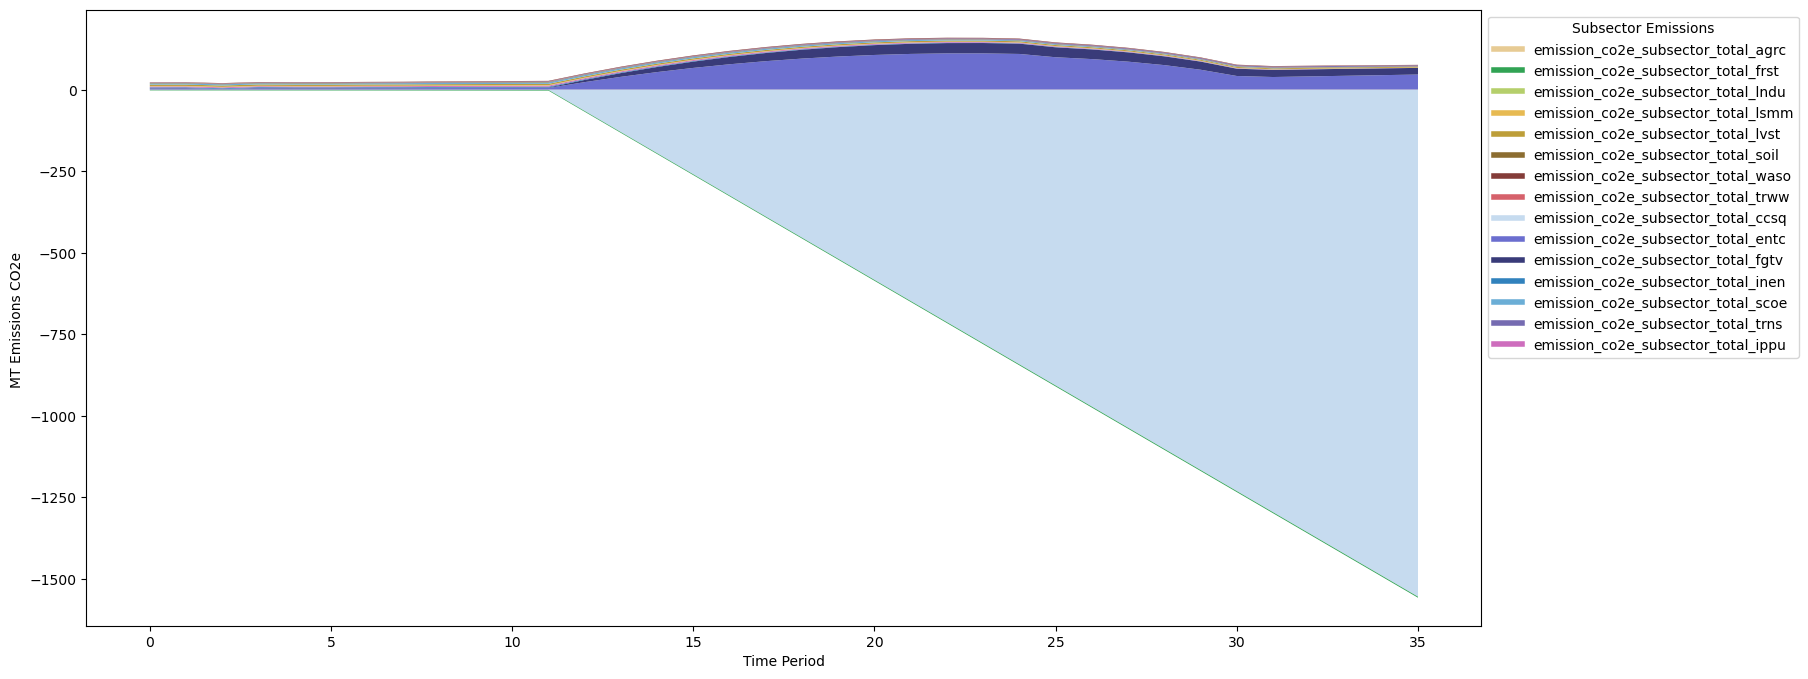

In [82]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[df_out[ssp.key_primary].isin([72072])]

fields = matt.get_all_subsector_emission_total_fields()
dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x="time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


In [83]:
strategys = df_out.primary_id.unique()

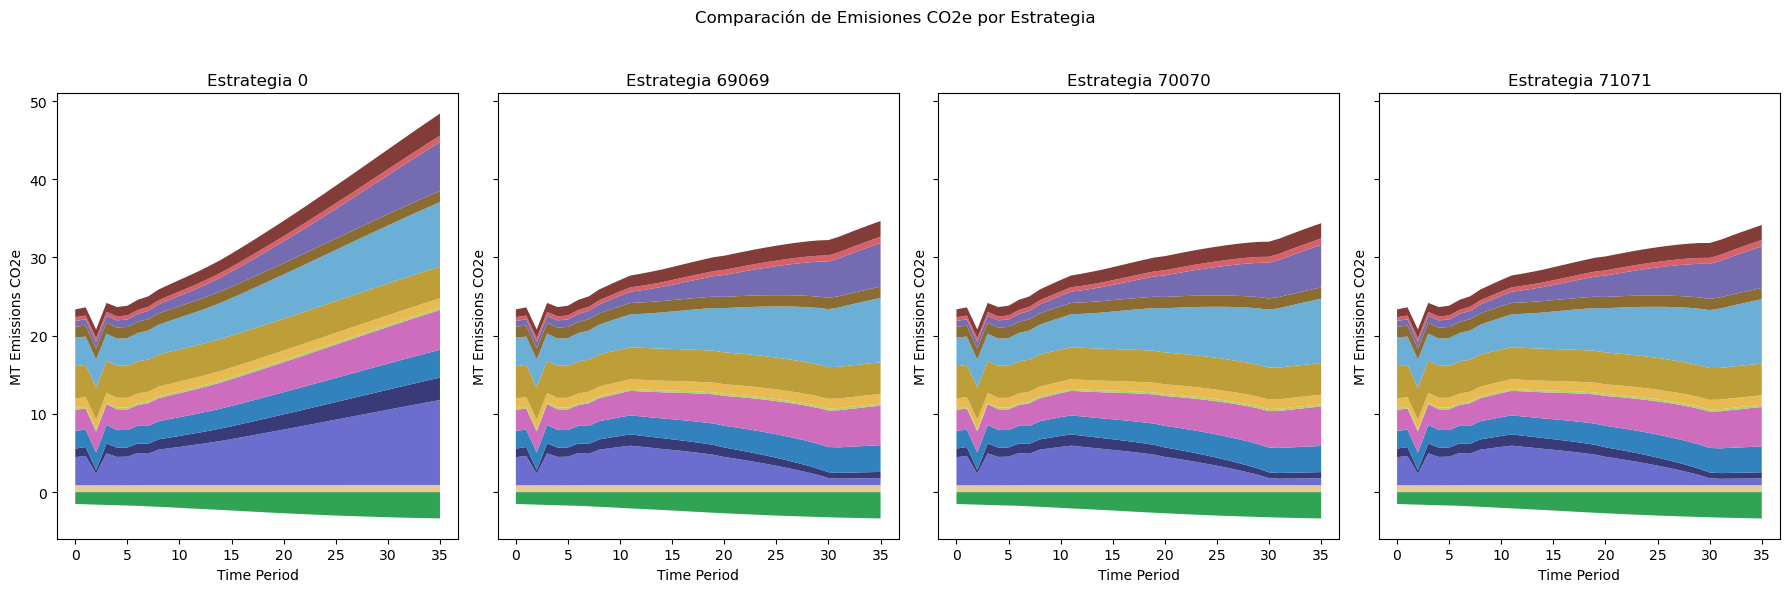

In [84]:
# Configuración del gráfico con tres subplots (uno para cada estrategia)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6), sharey=True)
fig.suptitle("Comparación de Emisiones CO2e por Estrategia")

# Iterar sobre cada estrategia y su respectivo eje
for ax, strategy in zip(axes, strategys):
    # Filtrar el DataFrame para la estrategia actual
    df_plot = df_out[df_out[ssp.key_primary].isin([strategy])]
    
    # Obtener los campos y el formato de color para cada subsector
    fields = matt.get_all_subsector_emission_total_fields()
    dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())
    
    # Graficar con el stackplot para la estrategia actual en su propio eje
    spu.plot_stack(
        df_plot,
        fields,
        dict_formatting=dict_format,
        field_x="time_period",
        figtuple=(fig, ax),
    )
    
    # Configurar etiquetas y título del subplot
    ax.set_title(f"Estrategia {strategy}")
    ax.set_xlabel("Time Period")
    ax.set_ylabel("MT Emissions CO2e")

# Mostrar el gráfico completo
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta para que el título principal no se superponga
plt.show()



# Export Wide File

In [85]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

In [86]:
df_out.head()

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,georgia,0,68043.892566,151354.043079,31404.873492,81856.221185,105627.965703,57648.297868,76258.593271,...,1.166552e+06,2.910869e+06,53111.993547,62028.324081,0.0,115873.824581,80053.907854,1.846732e+06,486067.626197,289499.051145
1,0,georgia,1,68038.488033,151342.021458,31402.379092,81849.719578,105619.575974,57643.719028,76252.536268,...,1.048334e+06,2.910638e+06,52936.213643,62233.532181,1108.0,115864.621052,80047.549399,2.228581e+06,467516.919002,274562.894120
2,0,georgia,2,68086.083016,151447.889786,31424.346007,81906.975936,105693.460067,57684.042555,76305.877226,...,1.034004e+06,2.918278e+06,52846.072734,62655.573713,1108.0,115945.671864,80114.225557,2.383097e+06,464501.090903,272884.874166
3,0,georgia,3,68101.985288,151483.262148,31431.685518,81926.106234,105718.145966,57697.515314,76323.699324,...,1.068133e+06,3.496025e+06,52998.336736,62350.504596,1108.0,115972.752283,91846.810698,2.469998e+06,513293.540909,267772.543460
4,0,georgia,4,68085.153665,151445.822575,31423.917076,81905.857934,105692.017388,57683.255188,76304.835678,...,8.799564e+05,2.912634e+06,52934.370165,62419.206053,1108.0,115944.089247,100728.833012,2.360005e+06,417496.736540,250346.822286


In [87]:
df_in.head()

,primary_id,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,14.251229,27.557750,0.921311,0.813395,0.0,3.30693,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.808034,27.557750,0.918334,0.816150,0.0,3.30693,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.624132,27.610771,0.916130,0.821111,0.0,3.30693,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,13.037755,33.069300,0.918555,0.816922,0.0,3.30693,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,10.743510,27.557750,0.917673,0.818024,0.0,3.30693,4.158464,50.068133,13.796953,13.766562


In [88]:
all_primaries = sorted(list(df_out[ssp.key_primary].unique()))
all_primaries

[0, 69069, 70070, 71071, 72072]

In [89]:
# build if unable to simply read the data frame
if df_in is None:
    df_in = []
     
    for region in ssp.regions:
        for primary in all_primaries: 
            df_in_filt = ssp.generate_scenario_database_from_primary_key(primary)
            df_in.append(df_in_filt.get(region))
    
    df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)

df_in 


,primary_id,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,14.251229,27.557750,0.921311,0.813395,0.0,3.306930,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.808034,27.557750,0.918334,0.816150,0.0,3.306930,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.624132,27.610771,0.916130,0.821111,0.0,3.306930,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,13.037755,33.069300,0.918555,0.816922,0.0,3.306930,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,10.743510,27.557750,0.917673,0.818024,0.0,3.306930,4.158464,50.068133,13.796953,13.766562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72072,georgia,31,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.280686,0.000000,0.000000,1.440675,0.0,3.205867,0.000000,0.000000,43.008559,72.234333
176,72072,georgia,32,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.285978,0.000000,0.000000,1.442999,0.0,3.211037,0.000000,0.000000,43.077928,72.350840
177,72072,georgia,33,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.291269,0.000000,0.000000,1.445322,0.0,3.216208,0.000000,0.000000,43.147296,72.467347
178,72072,georgia,34,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.296560,0.000000,0.000000,1.447646,0.0,3.221379,0.000000,0.000000,43.216665,72.583854


In [90]:
df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)
df_export

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,68043.892566,151354.043079,31404.873492,81856.221185,105627.965703,57648.297868,76258.593271,...,14.251229,27.557750,0.921311,0.813395,0.0,3.306930,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,68038.488033,151342.021458,31402.379092,81849.719578,105619.575974,57643.719028,76252.536268,...,12.808034,27.557750,0.918334,0.816150,0.0,3.306930,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,68086.083016,151447.889786,31424.346007,81906.975936,105693.460067,57684.042555,76305.877226,...,12.624132,27.610771,0.916130,0.821111,0.0,3.306930,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,68101.985288,151483.262148,31431.685518,81926.106234,105718.145966,57697.515314,76323.699324,...,13.037755,33.069300,0.918555,0.816922,0.0,3.306930,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,68085.153665,151445.822575,31423.917076,81905.857934,105692.017388,57683.255188,76304.835678,...,10.743510,27.557750,0.917673,0.818024,0.0,3.306930,4.158464,50.068133,13.796953,13.766562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72072,georgia,31,67922.928416,151084.975387,31349.043884,81710.702346,105440.186953,57545.814352,76123.025543,...,3.280686,0.000000,0.000000,1.440675,0.0,3.205867,0.000000,0.000000,43.008559,72.234333
176,72072,georgia,32,67912.727718,151062.285373,31344.335870,81698.430994,105424.351896,57537.172095,76111.593351,...,3.285978,0.000000,0.000000,1.442999,0.0,3.211037,0.000000,0.000000,43.077928,72.350840
177,72072,georgia,33,67902.510776,151039.559225,31339.620358,81686.140100,105408.491621,57528.516074,76100.142953,...,3.291269,0.000000,0.000000,1.445322,0.0,3.216208,0.000000,0.000000,43.147296,72.467347
178,72072,georgia,34,67892.277402,151016.796530,31334.897263,81673.829439,105392.605840,57519.846133,76088.674140,...,3.296560,0.000000,0.000000,1.447646,0.0,3.221379,0.000000,0.000000,43.216665,72.583854


In [91]:
# check output directory 
dir_pkg = os.path.join(
    ssp.file_struct.dir_out, 
    f"sisepuede_summary_results_run_{ssp.id_fs_safe}"
)
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None
dir_pkg

'/home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_summary_results_run_sisepuede_run_2024-11-07T13;36;10.852578'

In [92]:
for tab in ["ATTRIBUTE_STRATEGY"]:
    ssp.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


In [93]:
df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)
    
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{ssp.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

In [ ]:
ssp.file_struct.dir_out

'/home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out'

: 